In [1]:
from source.eolelib import ProcessWind, TowerDesign
import importlib
import source.eolelib
importlib.reload(source.eolelib)
def update():
    importlib.reload(source.eolelib)

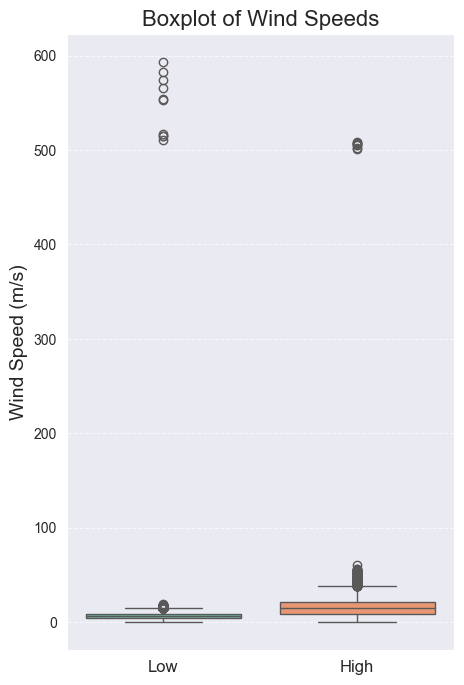

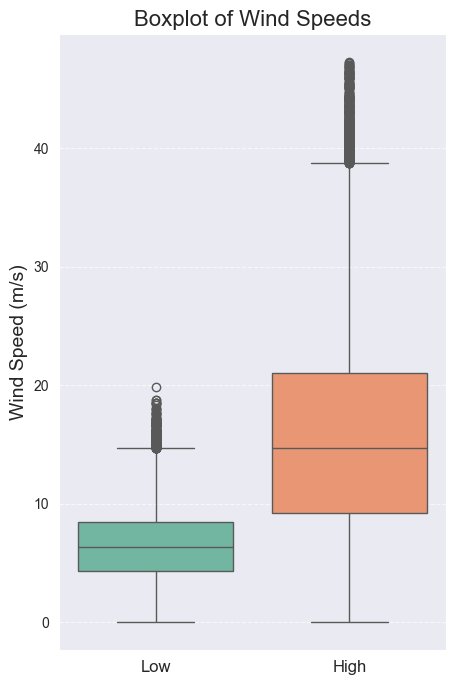

In [2]:
wind = ProcessWind(
    ["./data/wind_speed_dist_low.dat",
     "./data/wind_speed_dist_high.dat"]
)

wind.box_plot(labels=["Low", "High"], save="./figs/Boxplot_BeforeCleaning.png")

wind.clean_data()

wind.box_plot(labels=["Low", "High"], save="./figs/Boxplot_AfterCleaning.png")


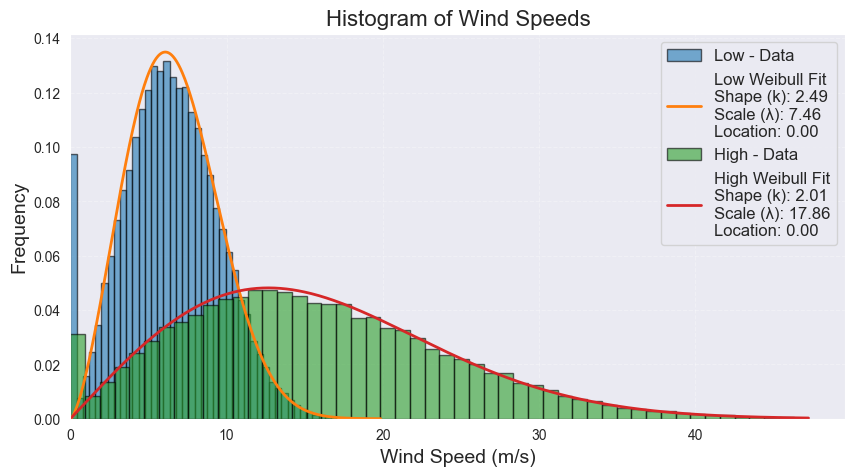

(                 Column  Mean Wind Speed (m/s)  Standard Deviation (m/s)  \
 0   wind_speed_dist_low               6.414694                  3.074616   
 1  wind_speed_dist_high              15.522112                  8.562683   
 
    Most Frequent Wind Speed (m/s)  P(Wind Speed > 12 m/s)  \
 0                          6.1566                0.037294   
 1                         11.8100                0.624228   
 
    Median Wind Speed (m/s)  
 0                     6.33  
 1                    14.67  ,
 {'wind_speed_dist_low': {'wind_distribution': 'wind_speed_dist_low',
   'shape': np.float64(2.4910702124440243),
   'scale': np.float64(7.463262477975276),
   'location': 0},
  'wind_speed_dist_high': {'wind_distribution': 'wind_speed_dist_high',
   'shape': np.float64(2.007466138958744),
   'scale': np.float64(17.86158317265724),
   'location': 0}})

In [3]:
wind.fit_weibull()
wind.distribution(labels=["Low", "High"], bins=50, save="./figs/wind_distributions.png")
wind.wind_speed_statistics(), wind.params


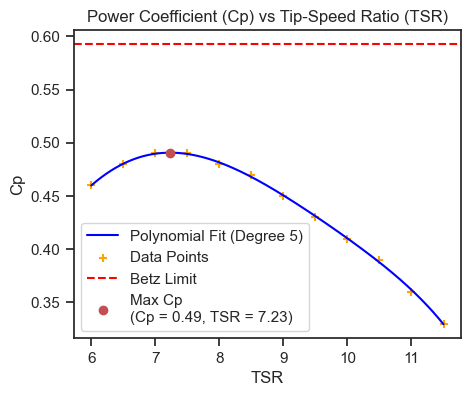

In [4]:
wind.plot_cp(latex=False, save="./figs/Cp_TSR_plot.png")

In [5]:
_ = wind.calc_performances()

C:\Users\louis\OneDrive - INSA de ROUEN Normandie\5.1_EOLE\EC3\ProjectEC3\source\eolelib.py:706: RuntimeWarning: invalid value encountered in divide
  torque = np.where(omega != 0, P / omega, 0)


Plot saved to ./figs/Performances_Single_Plot.png


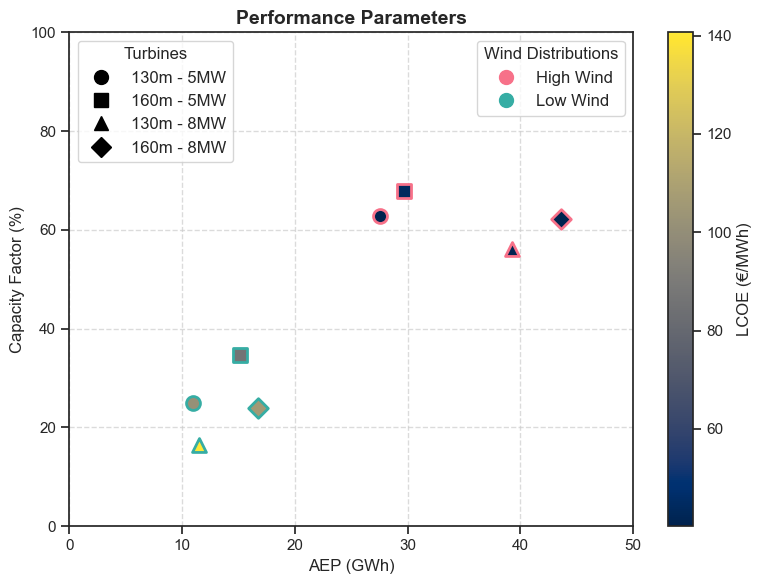

Plot saved to ./figs/Performances_Dual_Plot.png


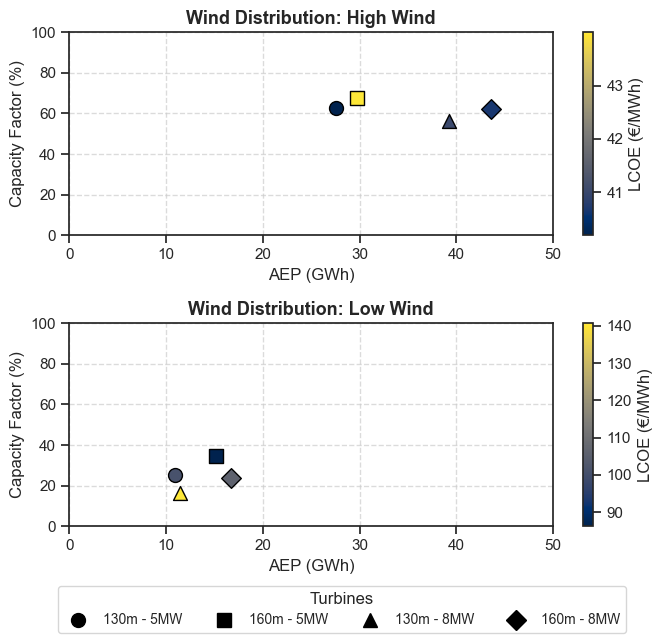

In [6]:
wind_dist_name = {
    'wind_speed_dist_low' : 'Low Wind',
    'wind_speed_dist_high' : 'High Wind',
}

turbine_name = {}
for turbine in wind.turbines:
    turbine_name[turbine.get('name')] = f"{turbine.get('rotor_diam')}m - {turbine.get('rated_power')}MW"
wind.plot_performance(turbine_names=turbine_name, wind_distribution_names=wind_dist_name, multiplot=False, cmap='cividis', save="./figs/Performances_Single_Plot.png")
wind.plot_performance(turbine_names=turbine_name, wind_distribution_names=wind_dist_name, multiplot=True, cmap='cividis', save ="./figs/Performances_Dual_Plot.png")

Plot saved to ./figs/Power_Torque_Speed_Wind_High.png


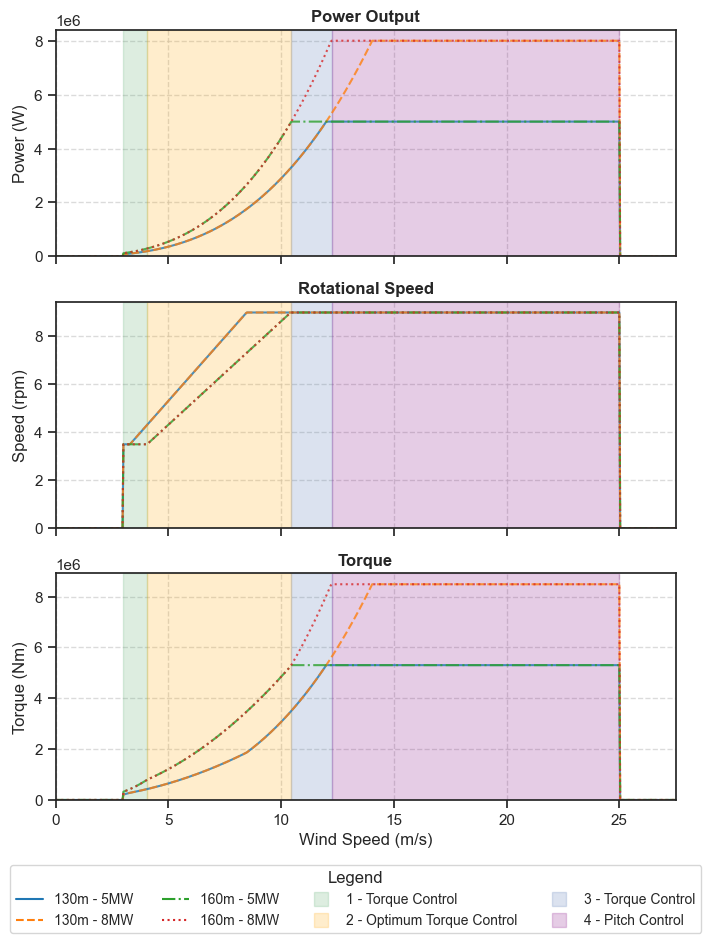

Plot saved to ./figs/Power_Torque_Speed_Wind_Low.png


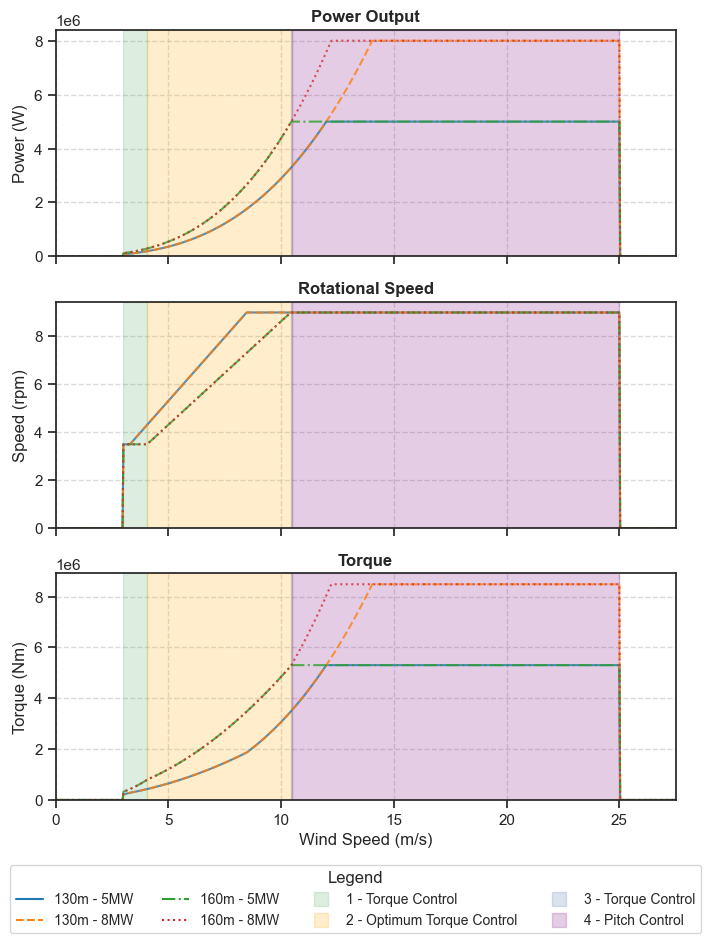

{'Small_Rotor_Small_Gen': '130m - 5MW',
 'Small_Rotor_Large_Gen': '130m - 8MW',
 'Large_Rotor_Small_Gen': '160m - 5MW',
 'Large_Rotor_Large_Gen': '160m - 8MW'}

In [7]:
wind.plot_turbine_performance('wind_speed_dist_high', 
                              turbine_names=turbine_name, 
                              rectangles=wind.generate_turbine_operation_zones('Large_Rotor_Large_Gen', 'wind_speed_dist_high'),
                              wind_lim_per = 1.1,
                              save = './figs/Power_Torque_Speed_Wind_High.png')

wind.plot_turbine_performance('wind_speed_dist_low', 
                              turbine_names=turbine_name, 
                              rectangles=wind.generate_turbine_operation_zones('Large_Rotor_Small_Gen', 'wind_speed_dist_low'),
                              wind_lim_per = 1.1,
                              save = './figs/Power_Torque_Speed_Wind_Low.png')

turbine_name

In [8]:
selected_turbine = {
    'low' : 'Large_Rotor_Small_Gen',
    'high' : 'Large_Rotor_Large_Gen',
}

tower = TowerDesign(selected_turbine)

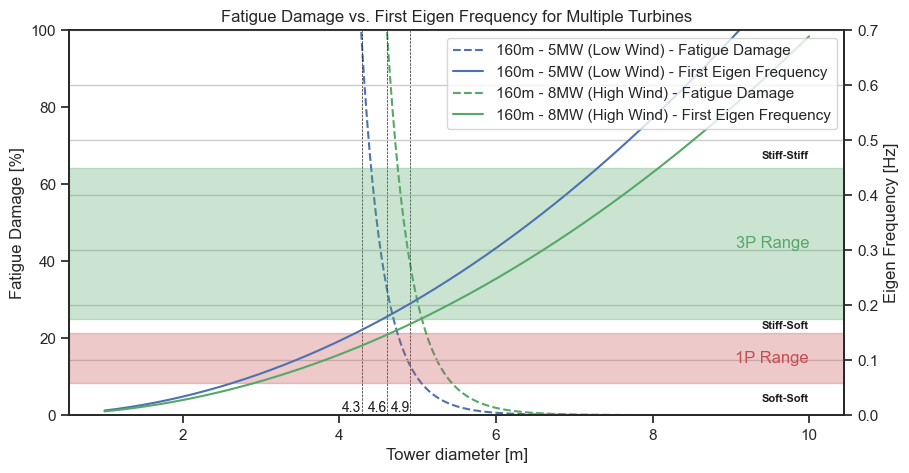

In [19]:
turbine_name = {
 'Large_Rotor_Small_Gen': '160m - 5MW (Low Wind)',
 'Large_Rotor_Large_Gen': '160m - 8MW (High Wind)'}
tower.plot_fatigue_and_frequency(turbine_names=turbine_name, save="./figs/Fatigue_and_Frequency.png")